<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%9C%8C%EC%BD%95%EC%8A%A8_%EC%88%9C%EC%9C%84%ED%95%A9_%26_man_whitney_U_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###맨 휘트니 검정 : 두 집단의 차이를 확인

독립적이어야 함, 대응 표본 사용 불가 <br>
대응 표본 : 동일 집단에서 얻은 두 표본 <br>
샘플의 크기가 작을 때는 검정력 하락 <br>
모집단의 분포가 완전히 다르면 검정력 하락 <br>
두 그룹간의 차이만 확인 가능

44.0 0.6744515499984522
귀무가설 기각 불가


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


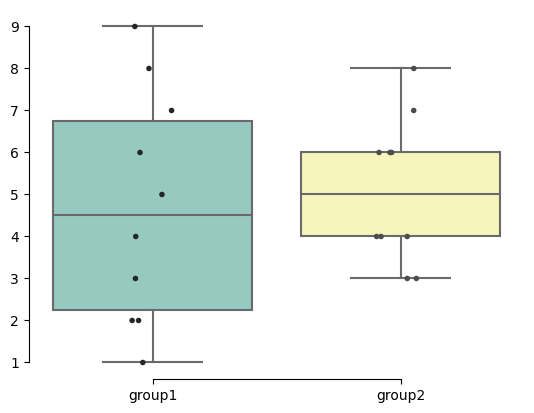

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import os
import seaborn as sns

data = {
    'group1' : [3,2,5,1,4,2,6,7,9,8],
    'group2' : [6,4,6,7,8,4,3,6,3,4]
}

df = pd.DataFrame(data)

os.makedirs('./data', exist_ok=True)
df.to_csv('./data/sample.csv', index=False, encoding='utf-8')

data = pd.read_csv("./data/sample.csv")

st, p = mannwhitneyu(data['group1'], data['group2'])
print(st,p)

if p > 0.05 :
  print ("귀무가설 기각 불가")
else :
  print("귀무가설 기각")


sns.boxplot(data=data[['group1', 'group2']], palette="Set3")
sns.stripplot(data=data[['group1', 'group2']], color='.3', size=4)
sns.despine(trim=True)
plt.show()

In [7]:
from scipy.stats import levene

stat, p = levene(data['group1'], data['group2'])

print(stat, p)

2.8656716417910433 0.10772397492152604


In [11]:
from scipy import stats

stat, p = mannwhitneyu(data['group1'], data['group2'])

n1,n2 = len(data['group1']), len(data['group2'])
print(n1,n2)

if stat > n1 * n2 / 2 :
  stat = n1 * n2 - stat

p_val = 2 * stats.norm.cdf(-abs(stat) / np.sqrt(n1 * n2 * (n1 + n2 +1)/12))

print(stat)
print(p_val)

10 10
44.0
0.000880743190741727


In [21]:
np.random.seed(42)
group1 = np.random.normal(loc=6, scale = 1.5, size=100)
group2 = np.random.normal(loc=6, scale = 1.5, size=100)

data = pd.DataFrame({
    'group1' : group1,
    'group2' : group2

})

os.makedirs('./data', exist_ok = True)
data.to_csv('./data/sleep_data.csv', index=False, encoding='utf-8')

sleep_data = pd.read_csv('./data/sleep_data.csv')

group1_data = sleep_data['group1']
group2_data = sleep_data['group2']


# two-sided = 양측검정 {'greater', 'less', 'two-sided'}
st, p_val = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
print(st, p_val)

if p_val > 0.05 :
  print("귀무 : 두 집단에 차이가 없음")
else :
  print("두 집단에 차이 있음")

4735.0 0.5181003943818003
귀무 : 두 집단에 차이가 없음
